# Introduction to Data Processing with Numpy and scikit-learn

In [ ]:
%pip install numpy scikit-learn matplotlib
import numpy as np
import matplotlib.pyplot as plt

## 1. The `ndarray` Datastructure

The central datastructure offered by Numpy is the `ndarray`, a versatile multi-dimensional typed array datastructure with fixed size.
Internally an `ndarray` is a struct with the following fields:
- `data`: A pointer to a buffer of contiguous memory.
- `shape`: A tuple of integers, describing the size of each dimension, i.e., `(3, 4)` denotes a $3 \times 4$ matrix.
- `dtype`: The datatype of the elements in `buffer`, e.g., `np.float64` or `np.int16`.
- `strides`: A tuple of integers describing the byte stride size for each dimension.

In [2]:
X = np.arange(12, dtype=np.int16) # Create a 1-dimensional int16 ndarray containing the numbers 0 to 11.
print(f"{X=}")
print(f"X.data=<ptr 0x{X.ctypes.data:x}>")
print(f"{X.shape=}")
print(f"{X.dtype=} ({X.itemsize=} bytes)")
print(f"{X.strides=}")

X=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int16)
X.data=<ptr 0x15800f56070>
X.shape=(12,)
X.dtype=dtype('int16') (X.itemsize=2 bytes)
X.strides=(2,)


Numpy offers a large collection of efficient multi-threaded operations for the `ndarray` datastructure.
Many operations can even be performed in $\mathcal{O}(1)$ time, by simply changing the `shape` or `strides` tuples without touching the values in the `data` buffer.
Three very useful operations, which (often) run in constant time, are reshaping, transposition and slicing.

### 1.1. Reshaping and Transposition

We begin by reshaping the array $X = [0, \dots, 11]$ defined above into a $3 \times 4$ matrix and then taking its transpose:

In [3]:
Y = X.reshape((3, 4))
print("The array X viewed as a 3 by 4 matrix:")
print(Y)
print(f"Both arrays are backed by the same data buffer: X.data=<ptr 0x{X.ctypes.data:x}>, Y.data=<ptr 0x{Y.ctypes.data:x}>.")
print(f"Only the shape and strides had to be changed:")
print(f"{X.shape=} -> {Y.shape=}")
print(f"{X.strides=} -> {Y.strides=}")

The array X viewed as a 3 by 4 matrix:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Both arrays are backed by the same data buffer: X.data=<ptr 0x15800f56070>, Y.data=<ptr 0x15800f56070>.
Only the shape and strides had to be changed:
X.shape=(12,) -> Y.shape=(3, 4)
X.strides=(2,) -> Y.strides=(8, 2)


In [4]:
print("Next, we transpose Y (via Y.T):")
print(Y.T)
print(f"This, again, does not change the data buffer: Y.data = Y.T.data = <ptr 0x{Y.T.ctypes.data:x}>")
print(f"Only the shape and strides tuples had to be reversed:")
print(f"{Y.shape=} -> {Y.T.shape=}")
print(f"{Y.strides=} -> {Y.T.strides=}")

Next, we transpose Y (via Y.T):
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]
This, again, does not change the data buffer: Y.data = Y.T.data = <ptr 0x15800f56070>
Only the shape and strides tuples had to be reversed:
Y.shape=(3, 4) -> Y.T.shape=(4, 3)
Y.strides=(8, 2) -> Y.T.strides=(2, 8)


### 1.2. Slicing

In addition to reshaping, we can also create subarrays from a given array in constant time: 

In [5]:
print("Simple slicing example:")
print(f"{X[2:]=}")
print(f"Data pointer difference between X and X[2:]: {X[2:].ctypes.data - X.ctypes.data} bytes")

Simple slicing example:
X[2:]=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int16)
Data pointer difference between X and X[2:]: 4 bytes


In [6]:
print("Multidimensional slice + adding a third dimension of size 1:")
Y_sub = Y[1:, -3:-1, None]
print(f"{Y_sub=}, {Y_sub.shape=}")
print(f"Data pointer difference between Y and Y_sub: {Y_sub.ctypes.data - Y.ctypes.data} bytes")
print(f"{Y.strides=} -> {Y_sub.strides=}")

Multidimensional slice + adding a third dimension of size 1:
Y_sub=array([[[ 5],
        [ 6]],

       [[ 9],
        [10]]], dtype=int16), Y_sub.shape=(2, 2, 1)
Data pointer difference between Y and Y_sub: 10 bytes
Y.strides=(8, 2) -> Y_sub.strides=(8, 2, 0)


### 1.3. Vectorization and Broadcasting

As we have just seen, quite a few operations on `ndarray`s can be performed very efficiently without actually changing the data buffer.
However, achieving constant runtime is of course not always possible; performing an arithmetic operation on every element of an arbitrary $n$-element array is in $\Omega(n)$.

Numpy uses highly optimized multithreaded C implementations internally, which makes such array operations still very fast, much faster than using loops in Python.
Replacing a slow Python loop with calls to efficient native parallel implementations is called *vectorization*.

In [7]:
print("Computing the first 100000 square numbers using numpy:")
%timeit (np.arange(100000, dtype=np.int64) + 1) ** 2

print("Computing the first 100000 square numbers using a Python list comprehension:")
%timeit [(z + 1) ** 2 for z in range(100000)]

Computing the first 100000 square numbers using numpy:


672 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Computing the first 100000 square numbers using a Python list comprehension:
6.53 ms ± 619 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Vectorization can also be used to apply an element-wise filter to an array.
We can, for example, use it to remove all odd numbers from the array $X = [0, \dots, 11]$ we defined above: 

In [8]:
print("Applying a boolean operator to an ndarray results in a boolean ndarray:", X % 2 == 0)
print("Boolean arrays can be used as indices, to filter other arrays:", X[X % 2 == 0])

Applying a boolean operator to an ndarray results in a boolean ndarray: [ True False  True False  True False  True False  True False  True False]
Boolean arrays can be used as indices, to filter other arrays: [ 0  2  4  6  8 10]


Numpy can not only apply operations to each element of a given array, it also supports the combination of arrays of differing shapes via a technique called [*broadcasting*](https://numpy.org/doc/stable/user/basics.broadcasting.html).
To get an intuition for what broadcasting is, we use it to add a vector to each row and to each column of the $3 \times 4$ matrix $Y$:

In [9]:
print(f"{Y=}")
a = np.array([1, 0, -1, 0])
print(f"We add {a=} to each row of Y:")
Y_a = Y + a.reshape((1, -1))
print(Y_a)

b = a[:-1]
print(f"We add {b=} to each column of Y:")
Y_b = Y + b.reshape((-1, 1))
print(Y_b)

Y=array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int16)
We add a=array([ 1,  0, -1,  0]) to each row of Y:
[[ 1  1  1  3]
 [ 5  5  5  7]
 [ 9  9  9 11]]
We add b=array([ 1,  0, -1]) to each column of Y:
[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 7  8  9 10]]


The following example shows how broadcasting can even be used to compute the products of all pairs of elements in $X = [1, \dots, 11]$:

In [10]:
X.reshape((-1, 1)) * X.reshape((1, -1))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22],
       [  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44],
       [  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55],
       [  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66],
       [  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88],
       [  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99],
       [  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110],
       [  0,  11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121]],
      dtype=int16)

## 2. Implementing the $k$-Means Algorithm with Numpy

We will now apply the techniques from the first section to implement the $k$-Means algorithm. First we generate synthetic data to apply the algorithm to.

### 2.1. Generating Example Data

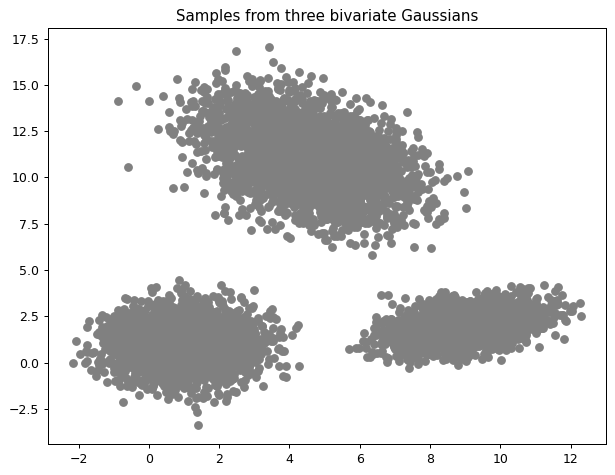

In [25]:
rng = np.random.default_rng(seed=42)

cluster_centers = np.array(
  [[1, 1],
   [9, 2],
   [4.5, 11]])
cluster1 = rng.multivariate_normal(cluster_centers[0], [[1, 0], [0, 1]], size=3000)
cluster2 = rng.multivariate_normal(cluster_centers[1], [[1, 0.3], [0.3, 0.5]], size=3000)
cluster3 = rng.multivariate_normal(cluster_centers[2], [[2, -1], [-1, 3]], size=3000)
data = np.concatenate([cluster1, cluster2, cluster3])

fig, ax = plt.subplots(figsize=(8, 6), dpi=(90))
ax.set_title("Samples from three bivariate Gaussians")
ax.scatter(cluster1[:,0], cluster1[:,1], color="gray")
ax.scatter(cluster2[:,0], cluster2[:,1], color="gray")
ax.scatter(cluster3[:,0], cluster3[:,1], color="gray")
# for cc in cluster_centers:
#   ax.text(cc[0], cc[1]+0.5, f"({cc[0]}, {cc[1]})", ha="center")
# ax.scatter(cluster_centers[:,0], cluster_centers[:,1], s=50, marker="x", c="black")
plt.show()

### 2.2. Naive Python Implementation of $k$-Means

For comparison purposes, we now implement $k$-Means in Python without any vectorization.

In [12]:
import random

def squared_dist_naive(x, y):
  return sum((xi - yi) ** 2 for xi, yi in zip(x, y))

def cluster_mean_naive(points):
  n = len(points)
  if n == 0:
    return
  center = [sum(xs) / n for xs in zip(*points)]
  return center

def k_means_naive(data, k, max_iterations=100, seed=7):
  rng = random.Random(seed)
  dim = len(data[0])
  # Generate k random cluster centers:
  centers = [[rng.random() for _ in range(dim)] for _ in range(k)]
  cluster_assignments = [-1] * len(data)

  # Update clusters and cluster centers iteratively:
  for _ in range(max_iterations):
    clusters = [[] for _ in range(k)]
    reassignment_flag = False

    # Assign each point to the closest cluster center:
    for j, point in enumerate(data):
      closest_center_i = None
      closest_center_dist = None
      for i, center in enumerate(centers):
        dist = squared_dist_naive(point, center)
        if closest_center_dist is None or dist < closest_center_dist:
          closest_center_i = i
          closest_center_dist = dist
      
      clusters[closest_center_i].append(point)
      if cluster_assignments[j] != closest_center_i:
        cluster_assignments[j] = closest_center_i
        reassignment_flag = True
    
    # If no point was reassigned, terminate:
    if reassignment_flag is False:
      return centers, clusters

    # Update the center of each cluster to the mean of the points assigned to it:
    for i, cluster in enumerate(clusters):
      center = cluster_mean_naive(cluster)
      if center is not None:
        centers[i] = center

  return centers, clusters

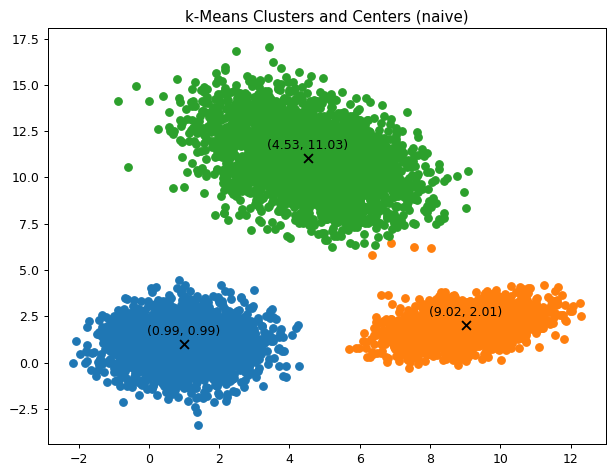

In [13]:
centers, clusters = k_means_naive(data, k=3)
centers = np.array(centers)
clusters = [np.array(cluster) for cluster in clusters]

def plot_clusters(centers, clusters, suffix):
  fig, ax = plt.subplots(figsize=(8, 6), dpi=(90))
  ax.set_title(f"k-Means Clusters and Centers ({suffix})")
  for cluster, center in zip(clusters, centers):
    ax.scatter(cluster[:,0], cluster[:,1])
    ax.text(center[0], center[1]+0.5, f"({center[0]:.2f}, {center[1]:.2f})", ha="center")
  ax.scatter(centers[:,0], centers[:,1], s=50, marker="x", c="black")
  plt.show()
  
plot_clusters(centers, clusters, "naive")

### 2.3. Vectorizing $k$-Means using Numpy

We will now improve the naive implementation from section 2.2. by vectorizing it.
Note that the $k$-Means essentially consists of three nested loops:
1. Repeatedly updating the clusters and cluster centers (line 21).
2. To update the cluster assignment of each datapoint we iterate over the datapoints (line 26).
3. To find the closest cluster for a given datapoint, we iterate over the cluster centers (line 29).



#### 2.3.1. Defining Helper Functions

- **Task 1:**
Implement a vectorized function `cluster_mean(X)`, which takes a matrix $X \in \mathbb{R}^{n \times d}$ as input and outputs the mean $c \in \mathbb{R}^d$ of its row vectors. 
Tip: Take a look at the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) of `np.mean`.

In [14]:
def cluster_mean(X):
  return np.mean(X, axis=0)


# Test code:
points_1 = np.arange(6).reshape((3,2))
mean_1 = cluster_mean(points_1)
assert np.all(mean_1 == np.array([2., 3.])), f"Invalid mean: {mean_1}."
points_2 = np.arange(6).reshape((2,3))
mean_2 = cluster_mean(points_2)
assert np.all(mean_2 == np.array([1.5, 2.5, 3.5])), f"Invalid mean: {mean_2}."
print("Great! Your implementation appears to behave correctly.")

Great! Your implementation appears to behave correctly.


- **Task 2:**
Implement a vectorized function `pairwise_squared_dist(X, Y)`, which takes two matrices $X \in \mathbb{R}^{n \times d}$ and $Y \in \mathbb{Y} \in \mathbb{R}^{m \times d}$ as input and which outputs the matrix $D \in \mathbb{R}^{n \times m}$ of the squared distances between all pairs of row vectors of $X$ and $Y$, i.e., $D_{i,j} = \sum_{\ell=1}^d {(X_{i,\ell} - Y_{j,\ell})}^2$.

In [15]:
def pairwise_squared_dist(X, Y):
  return np.sum((X[:,None,:] - Y[None,:,:]) ** 2, axis=-1)


# Test code:
points_1 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
points_2 = np.array([[0, 0], [2, 2]])
assert np.all(pairwise_squared_dist(points_2, points_2) == np.array([[0, 8], [8, 0]])), "Invalid."
assert np.all(pairwise_squared_dist(points_1, points_2) == np.array([[0, 8], [1, 5], [1, 5], [2, 2]])), "Invalid."
assert np.all(pairwise_squared_dist(points_1, points_1) == np.array([[0, 1, 1, 2], [1, 0, 2, 1],[1, 2, 0, 1], [2, 1, 1, 0]])), "Invalid."
print("Great! Your implementation appears to behave correctly.")

Great! Your implementation appears to behave correctly.


- **Task 3:** Use [`np.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) to determine the position of the smallest value in each row of a given matrix.

In [16]:
M = np.array([[10, -1, 3], [0, 1, 2], [3, 4, 1], [4, 2, 5]])

# Goal: Compute the array [1, 0, 2, 1]

np.argmin(M, axis=-1)

array([1, 0, 2, 1], dtype=int64)

- **Task 4:**
  Implement the function `cluster_means`. It should take a matrix $X \in \mathbb{R}^{n \times d}$, an $n$-element integer array `cluster_idx` and an integer `k` as input.
  
  It should output a matrix $M \in \mathbb{R}^{k \times d}$. The $i$-th row of $M$ (`M[i,:]`) should be the mean of all row vectors `X[j,:]` for which `cluster_idx[j] = i`.
  
  An example input with the expected output can be found in the test code below.
  
  *Hint: While it is possible to solve this task without any Python loops, it is also ok to use a loop over `range(k)` here.*

In [17]:
def cluster_means(X, cluster_idx, k):
  mask = (np.arange(k).reshape((-1, 1, 1)) == cluster_idx.reshape((1, -1, 1)))
  return np.sum(np.expand_dims(X, axis=0) * mask, axis=1) / np.sum(mask, axis=1)


# Test code:
points = np.array(
  [[1,1], # cluster 0
   [2,3], # cluster 1
   [1,2], # cluster 0
   [2,2], # cluster 1
   [5,5], # cluster 2
   [2,4]  # cluster 1
])
points_idx = np.array([0, 1, 0, 1, 2, 1])

# cluster_means should compute the mean of the first and third row of points; it should also compute the mean of the second, fourth and fifth row.
assert np.all(cluster_means(points, points_idx, k=3) == np.array([[1., 1.5], [2., 3.], [5., 5.]])), "Invalid."

print("Great! Your implementation appears to behave correctly.")

Great! Your implementation appears to behave correctly.


- **Task 5:** 
  Combine your solutions for the previous tasks to implement the complete $k$-Means algorithm in a vectorized manner.

In [18]:
def k_means(data, k=3, max_iterations=100, seed=42):
  rng = np.random.default_rng(seed=42)
  centers = rng.random((k, data.shape[-1]))
  cluster_idx = np.zeros(len(data), dtype=np.int32)
  
  # Update clusters and cluster centers iteratively:
  for _ in range(max_iterations):
    # Assign each point to the closest cluster center:
    distances = pairwise_squared_dist(data, centers)
    new_cluster_idx = np.argmin(distances, axis=-1)
    
    # If no point was reassigned, terminate:
    if np.all(new_cluster_idx == cluster_idx):
      break
    else:
      cluster_idx = new_cluster_idx
    
    # Update the center of each cluster to the mean of the points assigned to it:
    centers = cluster_means(data, cluster_idx, k)
  
  clusters = [data[cluster_idx == i] for i in range(k)]
  
  return centers, clusters

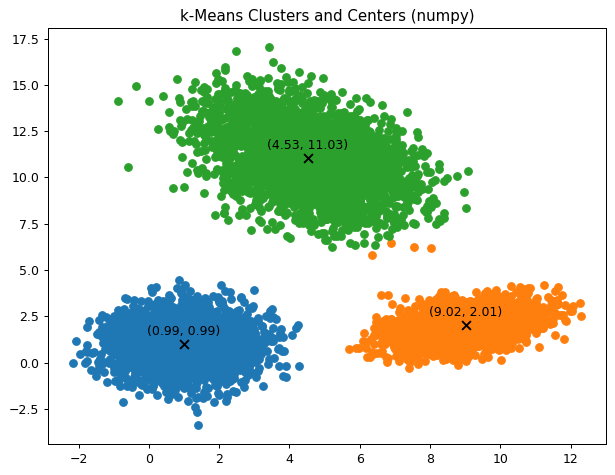

In [19]:
# Test code:
centers, clusters = k_means(data, k=3)
plot_clusters(centers, clusters, "numpy")

In [20]:
print("Performance of the naive implementation:")
%timeit k_means_naive(data, k=3)
print("Performance of the vectorized implementation:")
%timeit k_means(data, k=3)

Performance of the naive implementation:


232 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Performance of the vectorized implementation:
7.66 ms ± 638 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 3. Using the Builtin $k$-Means Implementation of scikit-learn

scikit-learn is a popular Python library which provides a large collection of ready-to-use machine learning algorithms and many useful utilities for implementing custom algorithms.
$k$-Means is supported by scikit-learn [out of the box](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [21]:
from sklearn.cluster import KMeans

def k_means_sklearn(data, k):
  km = KMeans(n_clusters=k, random_state=300, n_init=1, max_iter=100)
  cluster_idx = km.fit_predict(data)
  centers = km.cluster_centers_
  clusters = [data[cluster_idx == i] for i in range(k)]
  return centers, clusters

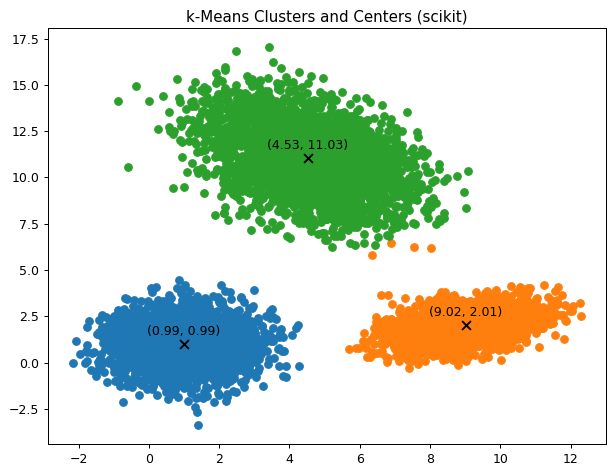

Performance of the scikit-learn implementation:
5.25 ms ± 194 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
centers, clusters = k_means_sklearn(data, k=3)
plot_clusters(centers, clusters, "scikit")
print("Performance of the scikit-learn implementation:")
%timeit k_means_sklearn(data, k=3)